In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import fastf1 as ff1
import fastf1.plotting
import matplotlib as mpl
import matplotlib.ticker as tck
import numpy as np
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from timple.timedelta import strftimedelta
from fastf1.core import Laps
#from matplotlib import font_manager

mpl.rcParams.update(mpl.rcParamsDefault)


fastf1.Cache.enable_cache('cache')  # replace with your cache directory

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='none', misc_mpl_mods=False)
session_year = 2023
session_event = 'Bahrain'
session_name = 'FP1'
session = fastf1.get_session(session_year, session_event, session_name)
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '44', '31', '27', '24', '23', '22', '21', '20', '18', '16', '14', '11', '10', '4', '2', '77', '81']


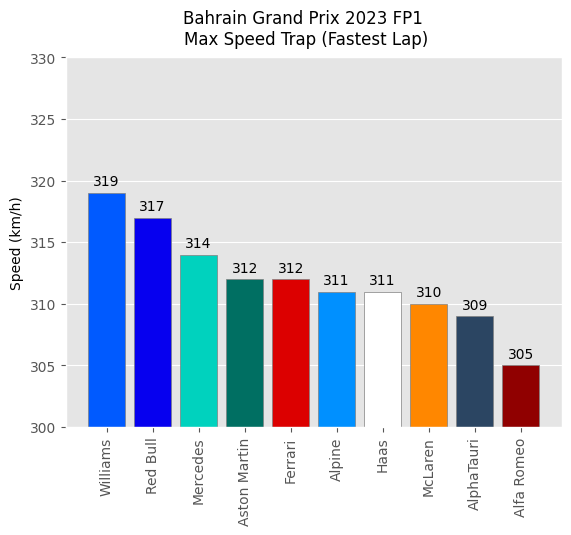

In [11]:
drivers = pd.unique(session.laps['Driver'])

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime')

speedtrap_by_team = fastest_laps[['Team', 'SpeedST']].groupby(['Team']).max().sort_values('SpeedST', ascending=False).reset_index()
speedtrap_by_team['ShortName'] = speedtrap_by_team['Team'].str.replace(' Racing', '').str.replace(' F1 Team', '')
team_colors = list()

for index, team in speedtrap_by_team.iterrows():
    color = ff1.plotting.team_color(team['Team'])
    team_colors.append(color)
    
plt.style.use("ggplot") 
fig, ax = plt.subplots()

hbars = ax.bar(speedtrap_by_team['ShortName']
               , speedtrap_by_team['SpeedST']
               , color=team_colors
               , edgecolor='grey')
#set the upper and lower boundaries of the y axis
plt.ylim(round((speedtrap_by_team['SpeedST'].min() - 10)/10)*10
         , round((speedtrap_by_team['SpeedST'].max() + 10)/10)*10)

ax.set(xlabel='')
ax.set(ylabel='Speed (km/h)')
ax.set_axisbelow(True)
ax.yaxis.grid(True, which='major', linestyle='-')
ax.xaxis.grid(False)

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session_name} \n"
             f"Max Speed Trap (Fastest Lap)")
plt.xticks(rotation=90)
ax.bar_label(hbars, fontsize=10, padding=3)
#uncomment the below to output a png of the graph
#plt.savefig(f'speedtraps/{session_year}_{session_event}_{session_name}_speedtrap_fastest_lap.png', bbox_inches='tight')
plt.show()

In [3]:
# if you just want to see the results in a table you can inspect the dataframe by running this
speedtrap_by_team 

,Team,SpeedST,ShortName
0,Williams,319.0,Williams
1,Red Bull Racing,317.0,Red Bull
2,Mercedes,314.0,Mercedes
3,Aston Martin,312.0,Aston Martin
4,Ferrari,312.0,Ferrari
5,Alpine,311.0,Alpine
6,Haas F1 Team,311.0,Haas
7,McLaren,310.0,McLaren
8,AlphaTauri,309.0,AlphaTauri
9,Alfa Romeo,305.0,Alfa Romeo


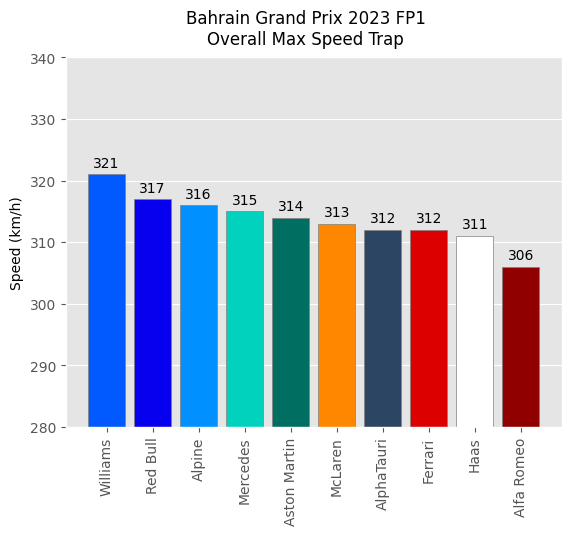

In [4]:
# this one is the overall speed trap max regardless of pick_fastest()
# the majority of the code is the same, just stored into a different df
speedtrap_by_team2 = session.laps[['Team', 'SpeedST']].groupby(['Team']).max().sort_values('SpeedST', ascending=False).reset_index()
speedtrap_by_team2['ShortName'] = speedtrap_by_team2['Team'].str.replace(' Racing', '').str.replace(' F1 Team', '')
team_colors2 = list()

for index, team in speedtrap_by_team2.iterrows():
    color = ff1.plotting.team_color(team['Team'])
    team_colors2.append(color)

plt.style.use("ggplot")
fig, ax = plt.subplots()
hbars = ax.bar(speedtrap_by_team2['ShortName']
               , speedtrap_by_team2['SpeedST']
               , color=team_colors2
               , edgecolor='grey')

plt.ylim(round((speedtrap_by_team['SpeedST'].min() - 20)/10)*10
         , round((speedtrap_by_team['SpeedST'].max() + 20)/10)*10)


ax.set(xlabel='')
ax.set(ylabel='Speed (km/h)')
ax.set_axisbelow(True)
ax.yaxis.grid(True, which='major', linestyle='-', color=(1, 1, 1))
ax.xaxis.grid(False)
plt.suptitle(f"{session.event['EventName']} {session.event.year} {session_name}\n"
             f"Overall Max Speed Trap")
plt.xticks(rotation=90)
ax.bar_label(hbars, fontsize=10, padding=3)
#uncomment the below to output a png of the graph
#plt.savefig(f'speedtraps/{session_year}_{session_event}_{session_name}_speedtrap_fastest_max.png', bbox_inches='tight')
plt.show()

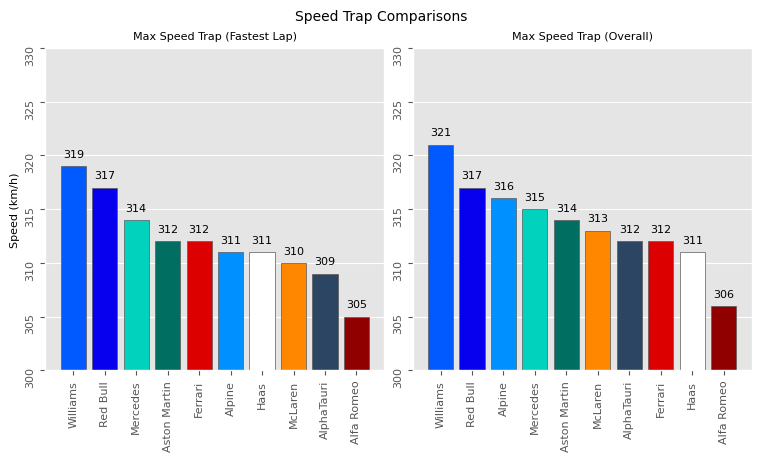

In [5]:
# This one will plot the two graphs side by side

plt.style.use("ggplot")
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(7.5, 4.5),
                        constrained_layout=True)

# use speedtrap_by_team2 for the y axis limits, as this will always contain the highest overall speeds
ymin = round((speedtrap_by_team2['SpeedST'].min() - 5)/10)*10
ymax = round((speedtrap_by_team2['SpeedST'].max() + 5)/10)*10


plot1 = axs[0].bar(speedtrap_by_team['ShortName']
               , speedtrap_by_team['SpeedST']
               , color=team_colors
               , edgecolor=(0.35,0.35,0.35))

plot2 = axs[1].bar(speedtrap_by_team2['ShortName']
               , speedtrap_by_team2['SpeedST']
               , color=team_colors2
               , edgecolor=(0.35,0.35,0.35))

for i in range(2):
    axs[i].yaxis.grid(True, which='major', linestyle='-')
    axs[i].xaxis.grid(False)
    axs[i].tick_params(labelrotation=90, labelsize=8)
    axs.flat[i].set_ylim(ymin, ymax)
    
axs[0].set_ylabel('Speed (km/h)', fontsize=8) 
axs[0].set_title(f"Max Speed Trap (Fastest Lap)", fontsize=8)
axs[1].set_title(f"Max Speed Trap (Overall)", fontsize=8)
axs[0].bar_label(plot1, fontsize=8, padding=5)
axs[1].bar_label(plot2, fontsize=8, padding=5)
fig.suptitle('Speed Trap Comparisons', fontsize=10)
#uncomment the below to output a png of the graph
#plt.savefig(f'speedtraps/{session_year}_{session_event}_{session_name}_speedtrap_combined.png', bbox_inches='tight')
plt.show()

In [6]:
# this will join two dataframes together (same as a left join in SQL)
# using this to build a smaller summary table of speedST from fastest lap, vs fastest speedST overall
speedtrap_by_team3 = pd.merge(speedtrap_by_team, speedtrap_by_team2[['Team','SpeedST']], how='left', on='Team')
speedtrap_by_team3

,Team,SpeedST_x,ShortName,SpeedST_y
0,Williams,319.0,Williams,321.0
1,Red Bull Racing,317.0,Red Bull,317.0
2,Mercedes,314.0,Mercedes,315.0
3,Aston Martin,312.0,Aston Martin,314.0
4,Ferrari,312.0,Ferrari,312.0
5,Alpine,311.0,Alpine,316.0
6,Haas F1 Team,311.0,Haas,311.0
7,McLaren,310.0,McLaren,313.0
8,AlphaTauri,309.0,AlphaTauri,312.0
9,Alfa Romeo,305.0,Alfa Romeo,306.0


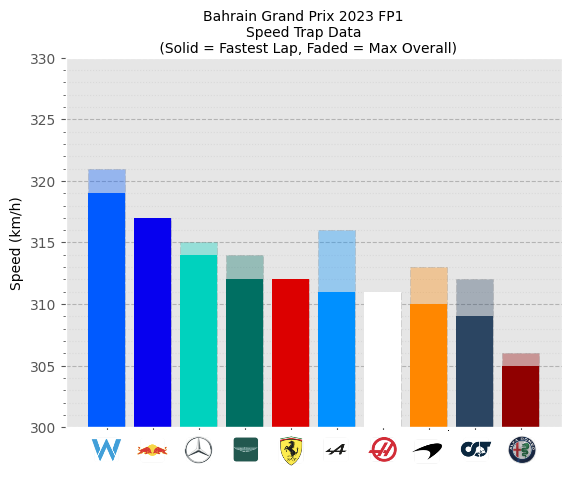

In [9]:
# these functions will allow you to use each teams logos instead of labels on the x axis
def get_team(name):
    path = "team_logos/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax, y):
    img = get_team(name)
    im = OffsetImage(img, zoom=0.23)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, y),  xybox=(0, -16), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

team_colors = list()

for index, team in speedtrap_by_team3.iterrows():
    color = ff1.plotting.team_color(team['Team'])
    team_colors.append(color)
    
fig, ax = plt.subplots()
plt.style.use("ggplot")
hbars = ax.bar(speedtrap_by_team3['ShortName']
               , speedtrap_by_team3['SpeedST_y']
               , color=team_colors
               , edgecolor='grey'
               , alpha=0.35
              , linestyle=(5, (10, 3)))
hbars2 = ax.bar(speedtrap_by_team3['ShortName']
               , speedtrap_by_team3['SpeedST_x']
               , color=team_colors
               #, edgecolor='grey'
               )
ax.set_xlabel('Team')

plt.ylim(round((speedtrap_by_team3['SpeedST_x'].min() - 10)/10)*10
         , round((speedtrap_by_team3['SpeedST_y'].max() + 5)/10)*10)

ax.set(xlabel='')
ax.set(ylabel='Speed (km/h)')
ax.set(facecolor=(0.90, 0.90, 0.90 ))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_axisbelow(True)
ax.yaxis.grid(True, which='major', linestyle='--', color=(0.70, 0.70, 0.70))
ax.yaxis.grid(True, which='minor', linestyle='dotted', color=(0.85, 0.85, 0.85))
ax.xaxis.grid(False)
plt.suptitle(f"{session.event['EventName']} {session.event.year} {session_name} \n"
             f"Speed Trap Data \n (Solid = Fastest Lap, Faded = Max Overall)"
             #commented out the f1 font as you will need to install this 
             #, family='Formula1' 
             , fontsize=10)
plt.xticks(rotation=90)
ax.set_ylabel('Speed (km/h)', fontsize=10) 

#label_colors = ['black', 'black', 'black', 'black', 'white', 'black', 'black' ,'black', 'white', 'white']
#ax.bar_label(hbars2, fontsize=8, padding=-10)
#ax.bar_label(hbars2, fontsize=10, padding=3)


for i, c in enumerate(speedtrap_by_team3['Team'].tolist()):
    offset_image(i, c, ax, round((speedtrap_by_team3['SpeedST_x'].min() - 10)/10)*10)

ax.set_xticklabels('')

#plt.savefig(f'speedtraps/{session_year}_{session_event}_{session_name}_speedtrap_overlay.png', bbox_inches='tight')
plt.show()

In [10]:
# just run some aggregate functions on the data to do some QA checks 
# as I was surprised to see some of the low values!
session.laps.groupby('Team').agg({'SpeedST': 'max', 'SpeedI1': 'max', 'SpeedI2' : 'max', 'SpeedFL' : 'max'})

,SpeedST,SpeedI1,SpeedI2,SpeedFL
Team,,,,
Alfa Romeo,306.0,237.0,263.0,278.0
AlphaTauri,312.0,236.0,266.0,280.0
Alpine,316.0,235.0,262.0,282.0
Aston Martin,314.0,241.0,266.0,283.0
Ferrari,312.0,235.0,266.0,282.0
Haas F1 Team,311.0,236.0,262.0,281.0
McLaren,313.0,238.0,265.0,283.0
Mercedes,315.0,238.0,269.0,288.0
Red Bull Racing,317.0,238.0,267.0,285.0
